<a href="https://colab.research.google.com/github/sebastianmunozvasq/Portfolio-SMV/blob/Initial-value-problems/Solving_problems_at_initial_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solving problems at initial values



### Topic 1: Problem Formulation for Initial Value Problems

#### Mass Balance - Liquid Height in the Tank with Respect to Time

The ordinary differential equation describing the change in the liquid level inside the tank (`z`) along with its initial condition is:

$$\frac{d z}{d t} = -\frac{\sqrt{2gz}}{4}\left(\frac{d}{R}\right)^2, \quad z(t=0)=\kappa H$$

Where `t` is time, `g` is the acceleration due to gravity, `d` is the diameter of the orifice, `R` is the radius of the tank, `H` is the height of the tank, and `\kappa` is the filling fraction. Using this equation, we can also express the change in the liquid volume (`V`) with respect to time:

$$\frac{d V}{d t} = -\frac{\sqrt{2gz}}{4}\pi d^2, \quad V(t=0)=\kappa H \pi R^2$$

#### Energy Balance - Temperature of the Liquid in the Tank with Respect to Time

The differential equation and boundary condition describing the change in the temperature of the tank subject to heat losses through natural convection and radiation are:

$$\frac{dT}{dt} = -\frac{2 h}{R \rho \hat{c}_p}(T-T_{air}) - \frac{2\varepsilon\sigma}{R \rho \hat{c}_p} (T^4-T_{air}^4), \hspace{1cm} T(t=0)=T_0$$

with the initial condition.

This ODE, along with the initial condition, constitutes the initial value problem associated with the cooling and drainage of the tank. This ODE is nonlinear and does not have a known analytical solution, presenting a significant opportunity to find its solution using numerical methods.

In the rest of the notebook, we will present the solution to this mathematical problem for the following cases:
- Base Case: Change in liquid height and temperature of the system considering cooling by natural convection and radiation.
- Case 1: Change in system temperature considering cooling by natural convection and radiation.
- Case 2: Change in system temperature considering cooling by natural convection.
- Case 3: Change in system temperature considering cooling by radiation.


#### Topic 2: Solution Using `solve_ivp`




#### Step 1: Import modules

In [20]:
# Data visualization and plotting
import matplotlib.pyplot as plt

# Numerical computation
import numpy as np

# Function for numerical integration
from scipy.integrate import solve_ivp


#### Step 2.1: Initialize the variables and parameters of the problem

In [21]:
# Known constant parameters

# Tank height / m
H = 10.0

# Tank radius / m
R = 1.5

# Initial liquid fill level (dimensionless)
kappa = 0.9

# Orifice diameter / m
d = 0.02

# Liquid density / kg m^-3
rho = 1300

# Acceleration due to gravity constant / m s^-2
g = 9.81

# Natural convection heat transfer coefficient / W m^-2 K^-1
h = 12

# Specific heat capacity at constant pressure / J kg^-1 K^-1
cp = 1000

# Emissivity of the tank wall material (dimensionless)
em = 0.9

# Stefan-Boltzmann constant / W m^-2 K^-4
sigma = 5.670374419e-8

# Air temperature / K
Taire = 273.15 + 22

# Initial temperature / K
T0 = 273.15 + 100


#### Step 2.2: Generate time vector with specific points where solution is desired

We define specific time vector required and initial value of height and temperature for base case.

For this, we will first define a discharge time `t_final` in seconds.

In [22]:
# Tank discharge time

# Initial time / s
t_0 = 0

# Final time, corresponding to 8 hours / s
t_final = 3600*8

# Define a tuple with the initial and final time
t_rango = (t_0, t_final)

# Define a vector of times where the solution will be evaluated.
# When using solve_ivp, the spacing dt is different from the numerical method's step size.
dt = 60*10
t_eval = np.arange(0.0, t_final+dt, dt)

# Initial values for height and temperature
y0 = [kappa*H, T0]


Define vector of required specific times and initial temperature value for cases 1 to 3

In [23]:
# Cooling time

# Initial time / s
t_0 = 0

# Final time, corresponding to 150 hours / s
t_final = 3600*150

# Define a tuple with the initial and final time
t_rango_T = (t_0, t_final)

# Define a vector of times where the solution will be evaluated.
# When using solve_ivp, the spacing dt is different from the numerical method's step size.
dt = 720*10
t_eval_T = np.arange(0.0, t_final+dt, dt)

# Initial value for temperature
y0_T = [T0]


#### Step 3: Define function containing our system of ordinary differential equations

Base case: change of liquid height and temperature. Cooling by convection and radiation.

In [24]:
# Define additional parameters required for the ODE function
p = (g, d, R, h, rho, cp, Taire, em, sigma)

# Function describing the change in liquid height and temperature over time
# Cooling by convection and radiation
def EDOs(t, y, g, d, R, h, rho, cp, Taire, em, sigma):
    """
    System of differential equations representing the variation
    in the height and temperature of the liquid in the tank
    as a function of time.

    Arguments:
        t: Time / s
        y: The state vector, containing the height (y[0]=z) and
            the temperature (y[1]=T) of the liquid
        g: The acceleration due to gravity / m^2 s^-1.
        d: The diameter of the orifice / m.
        R: The radius of the tank / m.
        h: The heat transfer coefficient / W m^-2 K^-1.
        rho: The density of the liquid / kg m^-3.
        cp: The specific heat capacity at constant pressure of the liquid / J kg^-1 K^-1.
        T_air: The air temperature / K.
        em: The emissivity of the tank's external surface.
        sigma: The Stefan-Boltzmann constant / W m^-2 K^-1.

    Returns:
        A list containing the time derivative of the height
        and temperature of the tank at time t.
    """

    # Unpack the height and temperature of the tank from the state vector y
    z = y[0]
    T = y[1]

    # ODE governing the variation in liquid height in the tank
    dz = - np.sqrt(2.0 * g * z) / 4 * (d / R)**2

    # ODE governing the variation in the temperature of the tank
    dT = - 2 * h / (R * rho * cp) * (T - Taire) - (2 * em * sigma / (R * rho * cp)) * (T - Taire)**4

    # Pack the vector of time derivatives
    dy = [dz, dT]

    # Return the vector
    return dy


We define three cases for the temperature change of the system.

Case 1: Temperature change with cooling by convection and radiation.

In [25]:
# Define additional parameters required for the ODE function
p_conv_rad = (R, h, rho, cp, Taire, em, sigma)

# Function describing the change in temperature over time
def EDO_conv_rad(t, y, R, h, rho, cp, Taire, em, sigma):
    """
    System of differential equations representing the variation
    in the temperature of the liquid in the tank as a function of time.

    Arguments:
        t: Time / s
        y: The state vector, containing the temperature (y) of the liquid
        R: The radius of the tank / m.
        h: The heat transfer coefficient / W m^-2 K^-1.
        rho: The density of the liquid / kg m^-3.
        cp: The specific heat capacity at constant pressure of the liquid / J kg^-1 K^-1.
        T_air: The air temperature / K.
        em: The emissivity of the tank's external surface.
        sigma: The Stefan-Boltzmann constant / W m^-2 K^-1.

    Returns:
        A list containing the time derivative of the tank's temperature at time t.
    """

    # Unpack the temperature of the tank from the state vector y
    T = y

    # ODE governing the variation in the temperature of the tank
    dT = - 2 * h / (R * rho * cp) * (T - Taire) - (2 * em * sigma / (R * rho * cp)) * (T**4 - Taire**4)

    # Return the vector
    return dT


Case 2: Temperature change with convection cooling.

In [26]:
# Define additional parameters required for the ODE function
p_conv = (R, h, rho, cp, Taire)

# Function describing the change in temperature over time
def EDO_conv(t, y, R, h, rho, cp, Taire):
    """
    System of differential equations representing the variation
    in the temperature of the liquid in the tank as a function of time.

    Arguments:
        t: Time / s
        y: The state vector, containing the temperature (y) of the liquid
        R: The radius of the tank / m.
        h: The heat transfer coefficient / W m^-2 K^-1.
        rho: The density of the liquid / kg m^-3.
        cp: The specific heat capacity at constant pressure of the liquid / J kg^-1 K^-1.
        T_air: The air temperature / K.

    Returns:
        A list containing the time derivative of the tank's temperature at time t.
    """

    # Unpack the temperature of the tank from the state vector y
    T = y

    # ODE governing the variation in the temperature of the tank
    dT = - 2 * h / (R * rho * cp) * (T - Taire)

    # Return the vector
    return dT


Case 3: Temperature change with radiation cooling.

In [27]:
# Define additional parameters required for the ODE function
p_rad = (R, rho, cp, Taire, em, sigma)

# Function describing the change in temperature over time
def EDO_rad(t, y, R, rho, cp, Taire, em, sigma):
    """
    System of differential equations representing the variation
    in the temperature of the liquid in the tank as a function of time.

    Arguments:
        t: Time / s
        y: The state vector, containing the temperature (y) of the liquid
        R: The radius of the tank / m.
        rho: The density of the liquid / kg m^-3.
        cp: The specific heat capacity at constant pressure of the liquid / J kg^-1 K^-1.
        T_air: The air temperature / K.
        em: The emissivity of the tank's external surface.
        sigma: The Stefan-Boltzmann constant / W m^-2 K^-4.

    Returns:
        A list containing the time derivative of the tank's temperature at time t.
    """

    # Unpack the temperature of the tank from the state vector y
    T = y

    # ODE governing the variation in the temperature of the tank
    dT = - (2 * em * sigma / (R * rho * cp)) * (T**4 - Taire**4)

    # Return the vector
    return dT


#### Step 4: Solve the EDO system with solve_ivp for liquid height and system temperature simultaneously

In [28]:
# Numerical integration
sol1 = solve_ivp(EDOs, t_rango, y0, method='RK23', args=p)


We display the fields stored in the solution vector *sol1*.

In [29]:
print(sol1)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.994e-01 ...  2.845e+04  2.880e+04]
        y: [[ 9.000e+00  9.000e+00 ...  3.741e-02  2.517e-02]
            [ 3.731e+02  3.731e+02 ...  3.501e+02  3.498e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 53
     njev: 0
      nlu: 0


We extract from the object *sol1* the time, height and temperature vectors

In [30]:
# Extract the time points and solution values from the result
tiempo1 = sol1.t
z1 = sol1.y[0]
T1 = sol1.y[1]


#### Step 5: Visualize the solution of $z$ and $T$ in time

The height of liquid in the pond decreases and the change in height is proportional to the square of time, $z\varpropto t^2$. What we expect since we know that the analytical solution for the liquid height ($z^\star$) is:
$$ z^\star = \left(\left(\kappa H\right)^{1/2} - \left(\frac{d}{R}\right)^2 \left(\frac{\sqrt{2 g}}{8}\right) t\right)^2$$

The liquid cools down and only decreases its temperature from ~352 K to ~336 K in the time it takes for the pond to empty completely.

We can see how the solution is stored for variable time steps with more values near the initial and final time of integration.

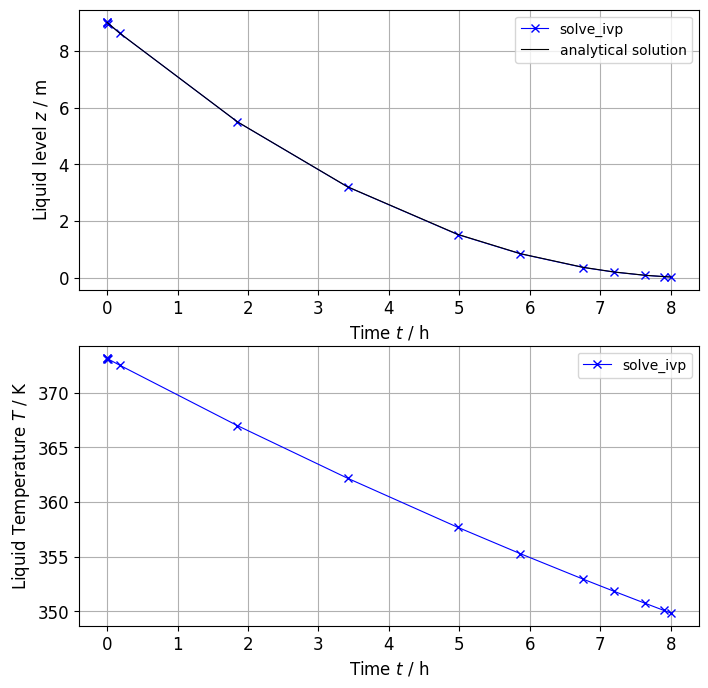

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[8, 8])

ax1.plot(tiempo1 / 3600, z1, color='b', marker='x', linestyle='-', linewidth=0.8, label='solve_ivp')
ax1.plot(tiempo1 / 3600, ((kappa * H)**(1/2) - (d / R)**2 * np.sqrt(2 * g) * tiempo1 / 8)**2, color='k', linestyle='-', linewidth=0.8, label='analytical solution')
ax1.grid()
ax1.set_xlabel('Time $t$ / h', size=12)
ax1.set_ylabel('Liquid level $z$ / m', size=12)
ax1.legend(fontsize=10)
ax1.tick_params(labelsize=12)

ax2.plot(tiempo1 / 3600, T1, color='b', marker='x', linestyle='-', linewidth=0.8, label='solve_ivp')
ax2.grid()
ax2.set_xlabel('Time $t$ / h', size=12)
ax2.set_ylabel('Liquid Temperature $T$ / K', size=12)
ax2.legend(fontsize=10)
ax2.tick_params(labelsize=12)

plt.show()


#### Step 6: Solution in specific times required

We perform the numerical integration of our mathematical problem and obtain the values of the solution in specific times. For this we only have to pass to the function the variable *t_eval* that contains an *ndarray* with the required time values.

In [32]:
# Numerical integration
sol2 = solve_ivp(EDOs, t_rango, y0, method='RK23', t_eval=t_eval, args=p)

# Extract the solution vectors for time, height, and temperature
tiempo2 = sol2.t
z2 = sol2.y[0]
T2 = sol2.y[1]


We visualize both solutions together, comparing the solution vectors stored for the case when we use *t_eval* with specific solution values required and the initial case where the solution is stored at the times used by `solve_ivp` for numerical integration only.

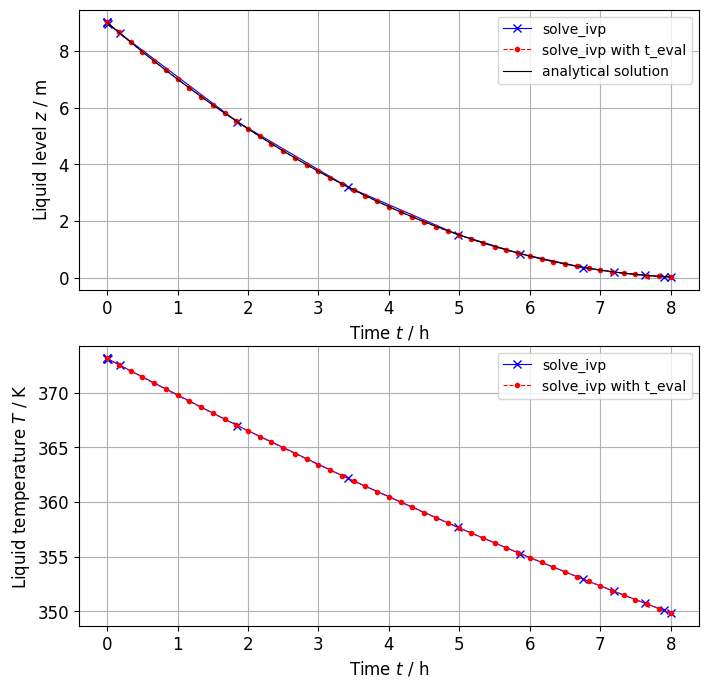

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[8, 8])

# Plot of liquid level
ax1.plot(tiempo1/3600, z1, color='b', marker='x', linestyle='-', linewidth=0.8, label='solve_ivp')
ax1.plot(tiempo2/3600, z2, color='r', marker='.', linestyle='--', linewidth=0.8, label='solve_ivp with t_eval')
ax1.plot(tiempo2/3600, ((kappa * H)**(1/2) - (d/R)**2 * np.sqrt(2*g) * tiempo2/8)**2, color='k', linestyle='-', linewidth=0.8, label='analytical solution')
ax1.grid()
ax1.set_xlabel('Time $t$ / h', size=12)
ax1.set_ylabel('Liquid level $z$ / m', size=12)
ax1.legend(fontsize=10)
ax1.tick_params(labelsize=12)

# Liquid temperature plots
ax2.plot(tiempo1/3600, T1, color='b', marker='x', linestyle='-', linewidth=0.8, label='solve_ivp')
ax2.plot(tiempo2/3600, T2, color='r', marker='.', linestyle='--', linewidth=0.8, label='solve_ivp with t_eval')
ax2.grid()
ax2.set_xlabel('Time $t$ / h', size=12)
ax2.set_ylabel('Liquid temperature $T$ / K', size=12)
ax2.legend(fontsize=10)
ax2.tick_params(labelsize=12)

plt.show()


#### Step 7: Solution for pond temperature change with different cooling types

Case 1: cooling by natural convection and radiation.

In [34]:
# Numerical integration
sol_conv_rad = solve_ivp(EDO_conv_rad, t_rango_T, y0_T, method='RK23', t_eval=t_eval_T, args=p_conv_rad)

# Extract time and temperature vectors from the solution
time_conv_rad = sol_conv_rad.t
T_conv_rad = sol_conv_rad.y[0]


Case 2: natural convection cooling

In [35]:
# Numerical integration
sol_conv = solve_ivp(EDO_conv, t_rango_T, y0_T, method='RK23', t_eval=t_eval_T, args=p_conv)

# Extract time and temperature vectors from the solution
time_conv = sol_conv.t
T_conv = sol_conv.y[0]


Case 3: Radiation cooling

In [36]:
# Numerical integration
sol_rad = solve_ivp(EDO_rad, t_rango_T, y0_T, method='RK23', t_eval=t_eval_T, args=p_rad)

# Extract time and temperature vectors from the solution
time_rad = sol_rad.t
T_rad = sol_rad.y[0]


We visualize the three solutions together for convection and radiation cooling, convection only and radiation only.

The solution for the liquid height in the pond is the same as for the base case. We do not repeat it here since we want to observe times longer than the pond discharge time.

The cooling of the tank occurs predominantly by natural convection and the temperature decreases non-linearly until thermal equilibrium with the surroundings is reached. Therefore the temperature of the system in a sufficiently long time approaches $T_{air}$.

In the case of cooling only by radiation the heat *flux* is very low and the tank temperature does not change significantly even for long times.

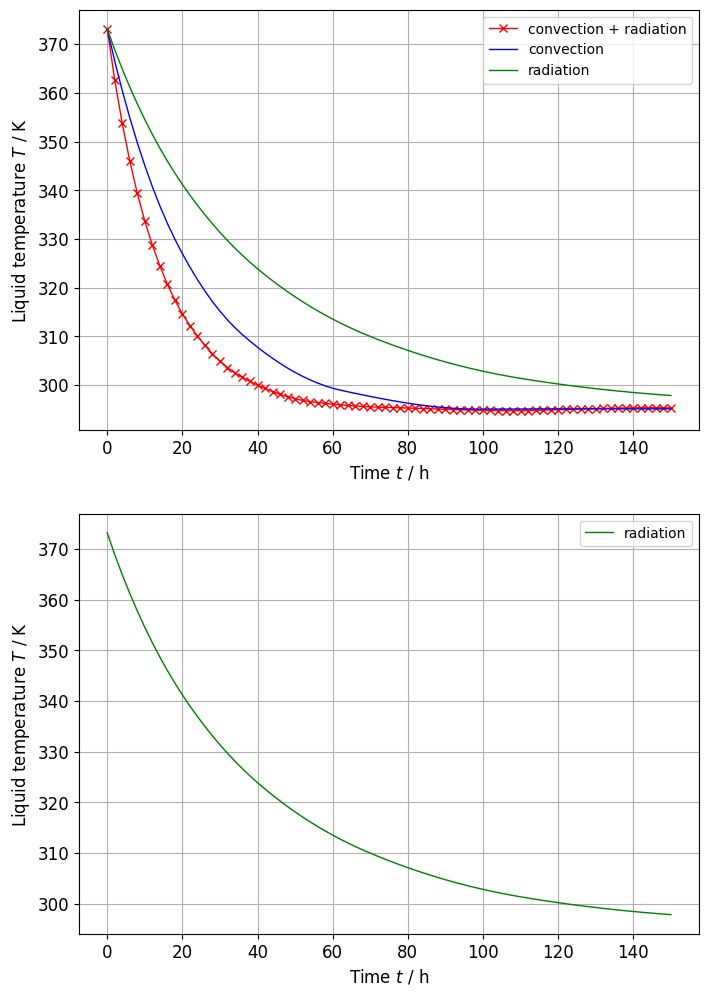

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[8, 12])

ax1.plot(time_conv_rad/3600, T_conv_rad, color='r', marker='x', linestyle='-', linewidth=1, label='convection + radiation')
ax1.plot(time_conv/3600, T_conv, color='b', linestyle='-', linewidth=1, label='convection')
ax1.plot(time_rad/3600, T_rad, color='g', linestyle='-', linewidth=1, label='radiation')
ax1.grid()
ax1.set_xlabel('Time $t$ / h', size=12)
ax1.set_ylabel('Liquid temperature $T$ / K', size=12)
ax1.legend(fontsize=10)
ax1.tick_params(labelsize=12)

ax2.plot(time_rad/3600, T_rad, color='g', linestyle='-', linewidth=1, label='radiation')
ax2.grid()
ax2.set_xlabel('Time $t$ / h', size=12)
ax2.set_ylabel('Liquid temperature $T$ / K', size=12)
ax2.legend(fontsize=10)
ax2.tick_params(labelsize=12)

plt.show()
